# Plant Seedling Classification CNN

Training images and labels are uploaded to google drive

*   Images file is in the form of .npy
*   Labels file is in the form of .csv

The dataset comprises 12 plant species. The goal of the projectis to create a classifier capable of determining a plant's species from a photo.

GitHub URL : https://github.com/kmprakashbabu/PlantSeedlingPredection-CNN

In [2]:
# Mount google drive to data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Downgrade tensorflow to 2.0.0
pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 57kB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 450kB 48.4MB/s 
     |████████████████████████████████| 3.8MB 51.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=376885261ce4d46c3eebbbcefae3881e2d09f1831534f42042ef241491ec9add
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstal

In [1]:
#import tensorflow and check the version
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
# Load all the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

#from tensorflow.keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import optimizers,layers

import cv2
from google.colab.patches import cv2_imshow

In [3]:
#Load the labels and check the data
labels_csv_df = pd.read_csv('/content/drive/My Drive/Labels.csv')
labels_csv_df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [5]:
labels_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [9]:
print(f"Labels shape : {labels_csv_df.shape}")

Labels shape : (4750, 1)


In [8]:
#load the images using np.load method
images_array = np.load('/content/drive/My Drive/images.npy')

In [10]:
#Check images and labels shape
print(f"Images Shape : {images_array.shape}")
print(f"Images Array Type : {images_array.dtype}")
print(f"Labels Shape{labels_csv_df.shape}")

Images Shape : (4750, 128, 128, 3)
Images Array Type : uint8
Labels Shape(4750, 1)


In [11]:
#Extract details like count, width, height etc form the shape
images_array_shape  = images_array.shape
img_orig_count      = images_array_shape[0]
img_width           = images_array_shape[1]
img_height          = images_array_shape[2]
img_channel         = images_array_shape[3]

print(f"Count : {img_orig_count}  Image dimension : ({img_width},{img_height})  Channels : {img_channel}")

Count : 4750  Image dimension : (128,128)  Channels : 3


In [12]:
#Resuable function to display images
def print_images(imgs_array, labels_df, count):
  for index in range(count):
    cv2_imshow(imgs_array[index])
    print(labels_df['Label'][index])

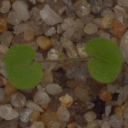

Small-flowered Cranesbill


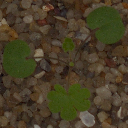

Small-flowered Cranesbill


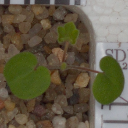

Small-flowered Cranesbill


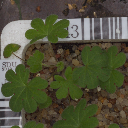

Small-flowered Cranesbill


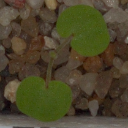

Small-flowered Cranesbill


In [13]:
#Let's display 5 images and their labels
print_images(images_array,labels_csv_df,5)

**Apply Gausssian blurring, normalize and visualize the after data preprocessing**


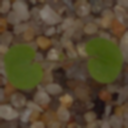

Small-flowered Cranesbill


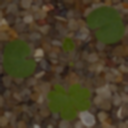

Small-flowered Cranesbill


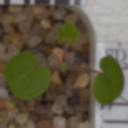

Small-flowered Cranesbill


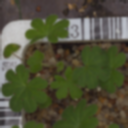

Small-flowered Cranesbill


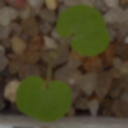

Small-flowered Cranesbill


In [39]:
#plt.imshow(images_array[0])
#plt.show()

#Apply Guassian blur to all the images
images = []
for index in range(img_orig_count):
  blurred_img = cv2.GaussianBlur(images_array[index], (5, 5), 0)
  images.append(blurred_img)

# Normalize the data
images = np.array(images);
#images_mean = np.mean(images[:,:,:,0])
#images_std = np.std(images[:,:,:,0])

#images = images.astype('float32') / 255

#print(images[:,:,:,0])
#cv2_imshow(images[0])

#Visualize the images after blur and normalization
print_images(images,labels_csv_df,5)

In [40]:
#One-hot-Encode labels
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels_csv_df)
print(y[0])

[0 0 0 0 0 0 0 0 0 0 1 0]


**Spliting data into training and testing set**

*   training set : 70%   
*   testing set: 30%    


 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

**Print y_train[0] label**

In [81]:
print(f"X_train shape : {X_train.shape}")
print(f"y_train[0] : {y_train[0]}")
print(f"y_train[0] label : {enc.classes_[np.argmax(y_train[0])]}")

X_train shape : (3325, 128, 128, 3)
y_train[0] : [0 0 0 0 1 0 0 0 0 0 0 0]
y_train[0] label : Common wheat


**split test data into**
*   50% test
*   50% validation

In [43]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [46]:
print(f"X_test shape : {X_test.shape}")
print(f"X_val shape : {X_val.shape}")

X_test shape : (712, 128, 128, 3)
X_val shape : (713, 128, 128, 3)


**Building CNN Model**

*   Create a Sequential Model and add the layers
*   Set optimizer as Adam
*   Set loss function as categorical_crossentropy
*   Set  metrics as Accuracy

In [48]:
# Set the CNN model

batch_size = 32

model = Sequential()
#model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", batch_input_shape = (batch_size,128, 128, 3)))
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)       

In [49]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [50]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

Train on 3325 samples, validate on 713 samples
Epoch 1/40
3296/3325 [============================>.] - ETA: 1s - loss: 4.2615 - accuracy: 0.1387
Epoch 00001: val_loss improved from inf to 2.44036, saving model to cifar_cnn_checkpoint_01_loss2.4404.h5
3325/3325 [==============================] - 239s 72ms/sample - loss: 4.2462 - accuracy: 0.1392 - val_loss: 2.4404 - val_accuracy: 0.1669
Epoch 2/40
3296/3325 [============================>.] - ETA: 1s - loss: 2.1817 - accuracy: 0.2439
Epoch 00002: val_loss improved from 2.44036 to 2.11069, saving model to cifar_cnn_checkpoint_02_loss2.1107.h5
3325/3325 [==============================] - 239s 72ms/sample - loss: 2.1808 - accuracy: 0.2448 - val_loss: 2.1107 - val_accuracy: 0.2595
Epoch 3/40
3296/3325 [============================>.] - ETA: 1s - loss: 1.9051 - accuracy: 0.3374
Epoch 00003: val_loss improved from 2.11069 to 1.85925, saving model to cifar_cnn_checkpoint_03_loss1.8593.h5
3325/3325 [==============================] - 240s 72ms/sa

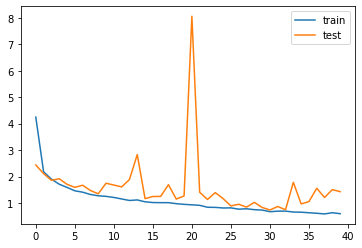

In [52]:
#model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=40,
                    validation_data=(X_val, Y_val),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [53]:
#Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3624304358878832
Test accuracy: 0.5168539


**After 40 Epoch even though training accuracy is .79, validation accuracy is just under .50 This we can see in the test accuracy as well around 50%**

In [55]:
#prediction
y_pred = model.predict(X_test.astype('float32'))

In [58]:
print(y_test)

[[0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [61]:
#Confustion matrix
from sklearn.metrics import classification_report, confusion_matrix

#print("=== Confusion Matrix ===")
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)


=== Confusion Matrix ===
[[  1   0   0   1   2   0  30   0   4   0   0   0]
 [  0  25   0   1   0   0   0   5  13   7   7   0]
 [  0   1  13   1   5   0   0   4   5   0  10   0]
 [  0   0   0 104   0   0   1   5   0   0   0   0]
 [  0   0   0   0  16   0   7   0   1   0   0   0]
 [  0   0   0  10  12  24   7   0   6   3   8   0]
 [  0   0   0   6   9   0  83   3   4   0   0   0]
 [  0   0   0   5   0   0   0  28   0   1   1   0]
 [  0   0   0  11   0   0   1   7  59   0   0   0]
 [  0   0   0  14   1   0   0   1   8   2   0   0]
 [  0   0   0  33   2   0   0   0  12  13  13   0]
 [  0   0   0   8   3   0   0   3  32   8   2   0]]


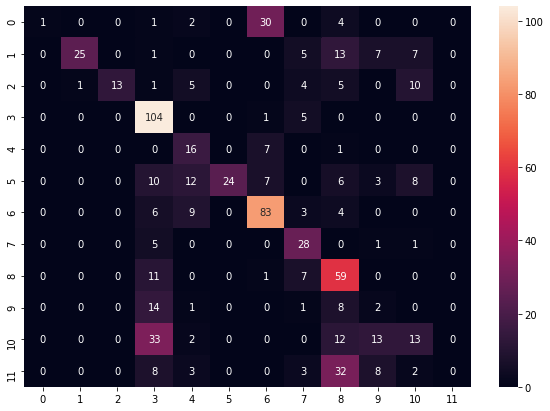

In [63]:
#Plotting confustion matrix
df_cm = pd.DataFrame(cm, index = [i for i in range(12)],
                     columns = [i for i in range(12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [ ]:
#Predicted_classes = model.predict_classes(X_test)

In [70]:
enc.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype='<U25')

In [73]:
#Define a method that takes in a index and prints the image, predicted and actual class
def show_prediction_vs_true(index):
  cv2_imshow(X_test[index])
  actual = np.argmax(y_test[index])
  print("Predicted class: {}".format(enc.classes_[y_pred_classes[index]]))
  print("Actual class: {}".format(enc.classes_[actual]))

In [74]:
#cv2_imshow(X_test[2])
#act = np.argmax(y_test[2])
#print("Predicted class: {}".format(enc.classes_[y_pred_classes[2]]))
#print("Actual class: {}".format(enc.classes_[act]))

#print(y_test[2])
#print(y_pred[2])
#print(y_pred_classes[2])



**Visualize x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]**

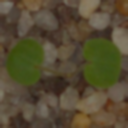

Predicted class: Scentless Mayweed
Actual class: Small-flowered Cranesbill


In [75]:
show_prediction_vs_true(2)

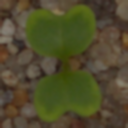

Predicted class: Maize
Actual class: Charlock


In [76]:
show_prediction_vs_true(3)

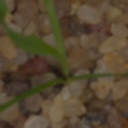

Predicted class: Maize
Actual class: Loose Silky-bent


In [77]:
show_prediction_vs_true(33)

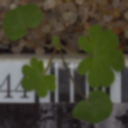

Predicted class: Shepherds Purse
Actual class: Small-flowered Cranesbill


In [78]:
show_prediction_vs_true(36)

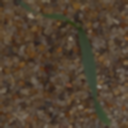

Predicted class: Loose Silky-bent
Actual class: Common wheat


In [79]:
show_prediction_vs_true(59)